In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string as s
from nltk.corpus import stopwords
import seaborn as sns
import re
import os

In [2]:
train_data=pd.read_csv(r"C:\Users\DINESH\Dropbox\PC\Desktop\train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv(r"C:\Users\DINESH\Dropbox\PC\Desktop\test.csv",header=0,names=['classid','title','desc'])

In [3]:
train_data

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
test_data

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [5]:
train_data.shape

(120000, 3)

In [6]:
test_data.shape

(7600, 3)

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classid', ylabel='count'>

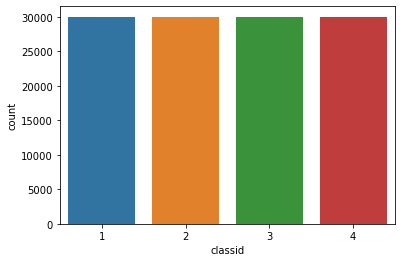

In [7]:
sns.countplot(train_data.classid)

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classid', ylabel='count'>

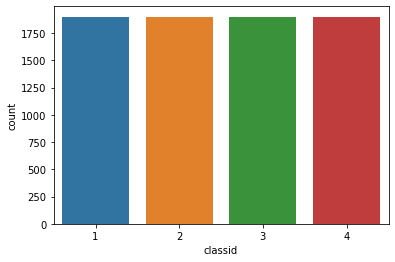

In [8]:
sns.countplot(test_data.classid)

In [9]:
train_x=train_data.desc
test_x=test_data.desc
train_y=train_data.classid
test_y=test_data.classid

In [10]:
train_x.shape

(120000,)

In [11]:
train_y.shape

(120000,)

In [12]:
test_y.shape

(7600,)

In [13]:

# removing the html tags
def remove_html(text):
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'',text)
train_x=train_x.apply(remove_html)
test_x=test_x.apply(remove_html)

# removing the url
def remove_url(text):
  url_pattern=re.compile(r'http?://\S+|www\.\S+')
  return url_pattern.sub(r'',text)
train_x=train_x.apply(remove_url)
test_x=test_x.apply(remove_url)


In [14]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
train_x=train_x.apply(word_tokenize)
test_x=test_x.apply(word_tokenize)

In [15]:
train_x

0         [Reuters, Short, sellers, Wall, Street's, dwin...
1         [Reuters, Private, investment, firm, Carlyle, ...
2         [Reuters, Soaring, crude, prices, plus, worrie...
3         [Reuters, Authorities, have, halted, oil, expo...
4         [AFP, Tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [KARACHI, Reuters, Pakistani, President, Perve...
119996    [Red, Sox, general, manager, Theo, Epstein, ac...
119997    [The, Miami, Dolphins, will, put, their, court...
119998    [PITTSBURGH, at, NY, GIANTS, Time, 1, 30, p, m...
119999    [INDIANAPOLIS, All, Star, Vince, Carter, was, ...
Name: desc, Length: 120000, dtype: object

In [16]:
def remove_words(text):
  stop=stopwords.words('english')
  new_list=[]
  for i in text:
    if i.lower() not in stop:
      new_list.append(i)
  return new_list
train_x=train_x.apply(remove_words)
test_x=test_x.apply(remove_words)

In [17]:
train_x

0         [Reuters, Short, sellers, Wall, Street's, dwin...
1         [Reuters, Private, investment, firm, Carlyle, ...
2         [Reuters, Soaring, crude, prices, plus, worrie...
3         [Reuters, Authorities, halted, oil, export, fl...
4         [AFP, Tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [KARACHI, Reuters, Pakistani, President, Perve...
119996    [Red, Sox, general, manager, Theo, Epstein, ac...
119997    [Miami, Dolphins, put, courtship, LSU, coach, ...
119998    [PITTSBURGH, NY, GIANTS, Time, 1, 30, p, Line,...
119999    [INDIANAPOLIS, Star, Vince, Carter, traded, To...
Name: desc, Length: 120000, dtype: object

In [18]:
def remove_numbers(text):
  a=[]
  b=[]
  for i in text:
    for j in s.digits:
      i=i.replace(j,'')
    a.append(i)
  for i in a:
    if i!='':
      b.append(i)
    return b
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [19]:
def stemming(text):
  porter_stemmer=nltk.PorterStemmer()
  roots=[porter_stemmer.stem(each) for each in text]
  return roots
train_x=train_x.apply(stemming)
test_x=test_x.apply(stemming)

In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DINESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# lemmitization
b=nltk.stem.WordNetLemmatizer()
def lemmitzer(text):
  new_lst=[]
  for i in text:
    i=b.lemmatize(i)
    new_lst.append(i)
  return new_lst

train_x=train_x.apply(lemmitzer)
test_x=test_x.apply(lemmitzer)

In [22]:
def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_extrawords)
test_x=test_x.apply(remove_extrawords) 

In [23]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [24]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=8,ngram_range=(1,3))
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:100])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
2015
['aaron', 'abc', 'abidjan', 'abu', 'abuja', 'ac', 'accord', 'account', 'accountingweb', 'accus', 'ace', 'acquisit', 'across', 'action', 'actor', 'ad', 'adam', 'addi', 'addit', 'adelaid', 'admit', 'adob', 'adrian', 'advanc', 'advertis', 'adweek', 'aerospac', 'afghan', 'afghanistan', 'afp', 'african', 'afrol', 'age', 'agenc', 'agi', 'agra', 'agreement', 'aid', 'ail', 'air', 'airbu', 'aircraft', 'airlin', 'akron', 'al', 'alan', 'alaska', 'albani', 'albert', 'albuquerqu', 'alcoa', 'alderson', 'alex', 'alexandria', 'alicia', 'alitalia', 'alleg', 'allen', 'allianc', 'allison', 'almost', 'alonzo', 'alreadi', 'also', 'altern', 'although', 'altria', 'alway', 'amanda', 'amateur', 'amazon', 'amd', 'ameli', 'america', 'american', 'amid', 'amman', 'among', 'amp', 'amsterdam', 'anaheim', 'analysi', 'analyst', 'anastasia', 'anchorag', 'andi', 'andr', 'andrew', 'angel', 'anglo', 'angri', 'anheus', 'anil', 'ankara', 'ann', 'annika', 'announc', 'annual', 'anonym', 'anoth']

In [25]:
pd.DataFrame(train_arr[:100], columns=tfidf.get_feature_names())

,aaron,abc,abidjan,abu,abuja,ac,accord,account,accountingweb,accus,...,year,yesterday,yet,young,yuko,zdnet,ziff,zimbabw,zimbabwean,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
%%time
from sklearn.naive_bayes  import MultinomialNB 
NB_MN=MultinomialNB(alpha=0.52)
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

Wall time: 1.27 s


In [27]:
print("first 20 actual labels")
print(test_y.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
first 20 predicted labels
[3, 4, 2, 2, 2, 1, 2, 1, 1, 4, 4, 4, 1, 2, 2, 1, 2, 3, 4, 4]


In [28]:
from sklearn.metrics  import f1_score,accuracy_score
print("F1 score of the model")
print(f1_score(test_y,pred,average='micro'))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_y,pred)*100,3),"%")

F1 score of the model
0.5456578947368421
Accuracy of the model
0.5456578947368421
Accuracy of the model in percentage
54.566 %
